In [2]:
import numpy as np
from time import time

### 1 Why not use loop
---

#### 1.1 Arrays are mutable

In [3]:
x_array = np.arange(5)
x_array

array([0, 1, 2, 3, 4])

In [4]:
x_array[0] = 99
x_array

array([99,  1,  2,  3,  4])

In [5]:
x_array[3:6] = [99,99] # this is permissable since the array returned by the slice is of the same shape as the assignment array
x_array

array([99,  1,  2, 99, 99])

#### 1.2 Loops are slow

In [6]:
bigmatrix = np.random.random((1000,2000))
bigmatrix.size

2000000

In [14]:
# A loop based computation of the sum of the max of all rows

def sum_of_max_loop(bigmatrix):
    
    m,n = bigmatrix.shape
    
    maxValues = np.zeros(shape=(m,))
    
    for i in range(m):
        for j in range(n):
            if(bigmatrix[i,j] > maxValues[i]):
                maxValues[i] = bigmatrix[i,j]
    
    sum_of_row_maxes = 0
    for i in range(m):
        sum_of_row_maxes += maxValues[i]
    
    return sum_of_row_maxes

In [36]:
start = time()
sum_of_row_maxes_loop = sum_of_max_loop(bigmatrix=bigmatrix)
duration_loop = time() - start

print(f"sum_of_max_loop = {sum_of_row_maxes_loop}")
print(f"took: {duration_loop:.4f} seconds.")

sum_of_max_loop = 999.4980226526912
took: 0.4161 seconds.


#### 1.3 Vectorized computation

In [37]:
def sum_of_max_vec(bigmatrix):
    maxValues = np.max(bigmatrix, axis=1)
    return sum(maxValues)

In [38]:
start = time()
sum_of_row_maxes_vec = sum_of_max_vec(bigmatrix)
duration_vec = time()-start

print(f"sum_of_max_vec = {sum_of_row_maxes_vec}")
print(f"took: {duration_vec:.4f} seconds")

sum_of_max_vec = 999.4980226526912
took: 0.0022 seconds


In [39]:
print(f"Therefore vectorized computation is roughly {duration_loop/duration_vec} times faster")

Therefore vectorized computation is roughly 186.9777182645956 times faster


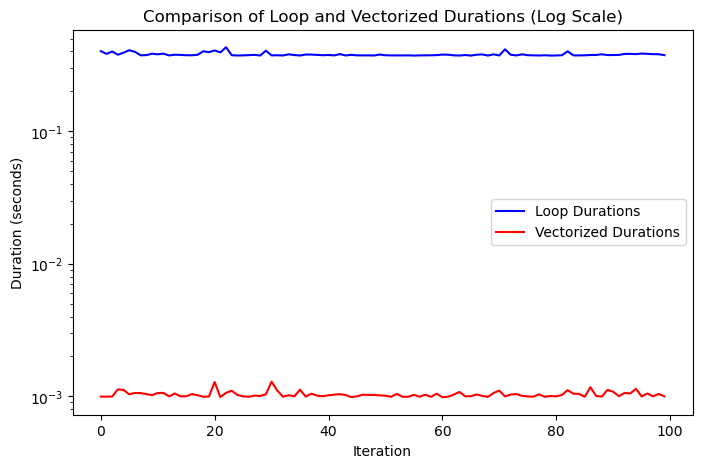

In [94]:
import matplotlib.pyplot as plt

x = np.arange(start=0, stop=100, step=1)
loop_durations = np.zeros_like(x, dtype=float)
vec_durations = np.zeros_like(x, dtype=float)


for i in range(100):
    
    start = time()
    sum_of_max_loop(bigmatrix)
    duration_loop = time() - start
    loop_durations[i] = duration_loop #round(duration_loop, ndigits=4)
    
    start = time()
    sum_of_max_vec(bigmatrix)
    duration_vec = time() - start
    vec_durations[i] = duration_vec #round(duration_vec, ndigits=4)

plt.figure(figsize=(8, 5))
plt.plot(x, loop_durations, label="Loop Durations", color='blue')
plt.plot(x, vec_durations, label="Vectorized Durations", color='red')

# Set the y-axis to a logarithmic scale
plt.yscale('log')

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Duration (seconds)')
plt.title('Comparison of Loop and Vectorized Durations (Log Scale)')

# Add a legend
plt.legend()

# Display the plot
plt.show()

- values closer to 0 appear appear on the plot as increasingly negative powers of 10
    - log_10(0.1) = -1 so the plot would label this value 10^-1
    - log_10(0.01) = -2 so the plot would label this value 10^-2
    - etc...

### 2 UFunc: Universal Functions
---

#### 2.1 Unary ufunc

- ufuncs are applied to the *entire* array efficiently utilizing highly optimized low level execution plans
- a unary function is a function with a single input
- when applied to a multidimensional numpy array, all elements are mapped to an output array organized in the same shape as the input array

In [106]:
# arbitrarily shaped ndarray

x = np.random.uniform(-100, 100, (3,2,2))
x = x.round(2)
print(f"{x}\n\nshape = {x.shape}")

[[[-69.13  86.27]
  [ 98.57 -99.07]]

 [[-18.66 -62.9 ]
  [ 61.54 -39.02]]

 [[-66.46  96.16]
  [-13.45  90.76]]]

shape = (3, 2, 2)


In [107]:
np.abs(x)

array([[[69.13, 86.27],
        [98.57, 99.07]],

       [[18.66, 62.9 ],
        [61.54, 39.02]],

       [[66.46, 96.16],
        [13.45, 90.76]]])

In [109]:
x / 100

array([[[-0.6913,  0.8627],
        [ 0.9857, -0.9907]],

       [[-0.1866, -0.629 ],
        [ 0.6154, -0.3902]],

       [[-0.6646,  0.9616],
        [-0.1345,  0.9076]]])

In [111]:
1/x

array([[[-0.0144655 ,  0.01159152],
        [ 0.01014507, -0.01009387]],

       [[-0.05359057, -0.01589825],
        [ 0.01624959, -0.02562788]],

       [[-0.01504664,  0.01039933],
        [-0.07434944,  0.01101807]]])

In [112]:
x / 100 * 2 * np.pi

array([[[-4.343566  ,  5.42050396],
        [ 6.19333576, -6.22475168]],

       [[-1.17244238, -3.95212356],
        [ 3.86667224, -2.45169891]],

       [[-4.17580496,  6.04191099],
        [-0.84508842,  5.70261898]]])

In [113]:
np.sin(x)

array([[[-0.01496106, -0.99234681],
        [-0.92484495,  0.99397459]],

       [[ 0.18842279, -0.06809419],
        [-0.96134694, -0.96893514]],

       [[ 0.46758282,  0.9422788 ],
        [-0.77304626,  0.33931345]]])

In [114]:
np.power(x,2)

array([[[4778.9569, 7442.5129],
        [9716.0449, 9814.8649]],

       [[ 348.1956, 3956.41  ],
        [3787.1716, 1522.5604]],

       [[4416.9316, 9246.7456],
        [ 180.9025, 8237.3776]]])